**Plant Leaf Classification**

In [1]:
import numpy as np
import pandas as pd
import os
import string

In [2]:
data=pd.read_csv('/content/Leaves_Data.csv')
data.head()

,Unnamed: 0,target,area,perimeter,length,width,aspect_ratio,rectangularity,circularity,red_mean,green_mean,blue_mean,stddev_red,stddev_green,stddev_blue,contrast,correlation,inverse_difference_moments,entropy
0,0,15,843937.0,4244.384236,1458,1074,1.357542,1.855461,21.346140,167.793780,207.620127,154.222089,97.441922,52.927330,110.988068,58.750630,0.994403,0.613982,6.558339
1,0,5,306503.0,5009.320310,890,1008,0.882937,2.926953,81.869639,20.489907,28.576953,16.027939,47.640131,63.939787,38.954248,10.379919,0.997302,0.866384,2.540257
2,0,14,469430.5,3181.059210,1370,503,2.723658,1.467970,21.556200,194.333595,207.118785,193.442008,102.793232,81.950700,103.678872,48.645325,0.996994,0.788666,3.899012
3,0,16,59014.5,3316.346766,1289,877,1.469783,19.155513,186.363620,5.211042,6.939242,4.361137,28.330930,35.025463,26.581207,4.245066,0.996141,0.964592,0.772433
4,0,10,643990.0,3282.536473,1258,758,1.659631,1.480712,16.731697,33.702442,60.476025,24.696687,49.586069,84.499100,37.646824,16.099599,0.997471,0.725599,4.801006


In [3]:
data = data.iloc[:,1:]
data.head(5)

,target,area,perimeter,length,width,aspect_ratio,rectangularity,circularity,red_mean,green_mean,blue_mean,stddev_red,stddev_green,stddev_blue,contrast,correlation,inverse_difference_moments,entropy
0,15,843937.0,4244.384236,1458,1074,1.357542,1.855461,21.346140,167.793780,207.620127,154.222089,97.441922,52.927330,110.988068,58.750630,0.994403,0.613982,6.558339
1,5,306503.0,5009.320310,890,1008,0.882937,2.926953,81.869639,20.489907,28.576953,16.027939,47.640131,63.939787,38.954248,10.379919,0.997302,0.866384,2.540257
2,14,469430.5,3181.059210,1370,503,2.723658,1.467970,21.556200,194.333595,207.118785,193.442008,102.793232,81.950700,103.678872,48.645325,0.996994,0.788666,3.899012
3,16,59014.5,3316.346766,1289,877,1.469783,19.155513,186.363620,5.211042,6.939242,4.361137,28.330930,35.025463,26.581207,4.245066,0.996141,0.964592,0.772433
4,10,643990.0,3282.536473,1258,758,1.659631,1.480712,16.731697,33.702442,60.476025,24.696687,49.586069,84.499100,37.646824,16.099599,0.997471,0.725599,4.801006


In [4]:
X=data.drop('target',axis=1)
X.head()

,area,perimeter,length,width,aspect_ratio,rectangularity,circularity,red_mean,green_mean,blue_mean,stddev_red,stddev_green,stddev_blue,contrast,correlation,inverse_difference_moments,entropy
0,843937.0,4244.384236,1458,1074,1.357542,1.855461,21.346140,167.793780,207.620127,154.222089,97.441922,52.927330,110.988068,58.750630,0.994403,0.613982,6.558339
1,306503.0,5009.320310,890,1008,0.882937,2.926953,81.869639,20.489907,28.576953,16.027939,47.640131,63.939787,38.954248,10.379919,0.997302,0.866384,2.540257
2,469430.5,3181.059210,1370,503,2.723658,1.467970,21.556200,194.333595,207.118785,193.442008,102.793232,81.950700,103.678872,48.645325,0.996994,0.788666,3.899012
3,59014.5,3316.346766,1289,877,1.469783,19.155513,186.363620,5.211042,6.939242,4.361137,28.330930,35.025463,26.581207,4.245066,0.996141,0.964592,0.772433
4,643990.0,3282.536473,1258,758,1.659631,1.480712,16.731697,33.702442,60.476025,24.696687,49.586069,84.499100,37.646824,16.099599,0.997471,0.725599,4.801006


In [5]:
y=data.target
y.head()

0    15
1     5
2    14
3    16
4    10
Name: target, dtype: int64

**Checking missing values**

In [6]:
X.isnull().sum()

area                          0
perimeter                     0
length                        0
width                         0
aspect_ratio                  0
rectangularity                0
circularity                   0
red_mean                      0
green_mean                    0
blue_mean                     0
stddev_red                    0
stddev_green                  0
stddev_blue                   0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
dtype: int64

**Splitting into Training and Testing data**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 140)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

**Support Vector Machine**

In [11]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [12]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [13]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [14]:
y_pred = svm_clf.predict(X_test)

In [15]:
accuracy1=metrics.accuracy_score(y_test, y_pred)
print(accuracy1)

0.8922413793103449


**KNN Classifier**

In [17]:
parameters=[{'n_neighbors':list(range(1, 31))} ]

In [18]:
knn=GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29,
                                          30]}])

In [19]:
knn.best_params_

{'n_neighbors': 1}

In [20]:
y_pred=knn.predict(X_test)

In [21]:
accuracy2=metrics.accuracy_score(y_test, y_pred)
print(accuracy2)

0.7801724137931034


**Naive Baiyes Classifier**

In [22]:
parameters=[{'var_smoothing': np.logspace(0,-9, num=100)}]

In [23]:
nb=GridSearchCV(GaussianNB(), parameters, cv=5)
nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid=[{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}])

In [24]:
nb.best_params_

{'var_smoothing': 0.0001232846739442066}

In [25]:
y_pred=nb.predict(X_test)

In [26]:
accuracy3=metrics.accuracy_score(y_test, y_pred)
print(accuracy3)

0.7392241379310345


**Random Forest Classifier**

In [27]:
parameters=[{
                  'n_estimators':[5,10,20],
                  'criterion':['entropy'],
                  "max_features": ['sqrt'],
                  "max_depth": [10, 15, 20, 25, 30],
                  "min_samples_split": [2, 4, 6],
                  "min_samples_leaf": [1, 2],
                  "bootstrap": [False]
             }]

In [28]:
rf=GridSearchCV(RandomForestClassifier(), parameters, cv=5)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [False], 'criterion': ['entropy'],
                          'max_depth': [10, 15, 20, 25, 30],
                          'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                          'min_samples_split': [2, 4, 6],
                          'n_estimators': [5, 10, 20]}])

In [29]:
rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 20}

In [30]:
y_pred=rf.predict(X_test)

In [31]:
accuracy4=metrics.accuracy_score(y_test, y_pred)
print(accuracy4)

0.8275862068965517


**Plotting Accuracy**

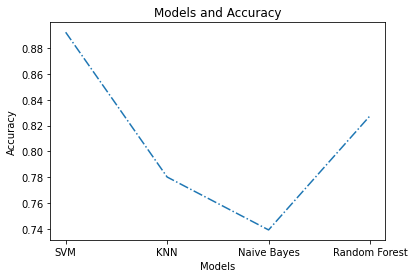

In [32]:
import matplotlib.pyplot as plt
a=['SVM','KNN','Naive Bayes','Random Forest']
a1=[accuracy1,accuracy2,accuracy3,accuracy4]
plt.plot(a,a1,'-.')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title('Models and Accuracy')
plt.show()

SVM is giving the best accuracy.

**Exporting model into Pickle File**

In [34]:
import pickle
with open('plant_leaf_classification_model.pickle','wb') as f:
    pickle.dump(svm_clf,f)